# K-Nearest Neighbours (K-NN)

### Importing libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [32]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Spliting the dataset into the Yraining and TestSet

In [33]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting Classifier to the Training set

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predicting the Test set result

In [36]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [38]:
cm


array([[64,  4],
       [ 3, 29]])

### Visualising the training set results


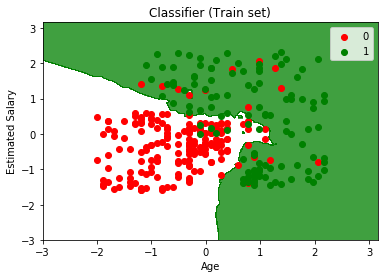

In [39]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                   np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('white','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the training set results

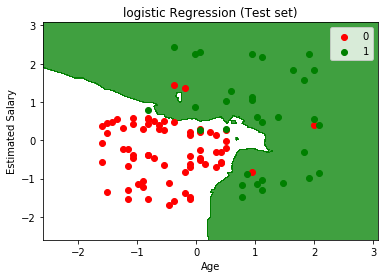

In [40]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                   np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('white','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)
plt.title('logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()